<a href="https://colab.research.google.com/github/MaciejAutuch/Visual_Recognition_Project/blob/main/Image_Recognition_with_K_NN_Benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMAGE RECOGNITION With K-NN**


# Liblary Imports, Drive Connection and file unzipping

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm


In [ ]:
# unzip data and store in colab directory

!unzip /content/gdrive/MyDrive/processed_data.zip -d '/content'

Archive:  /content/gdrive/MyDrive/processed_data.zip
  inflating: /content/processed_data/test_label.csv  
  inflating: /content/processed_data/train_label.csv  
  inflating: /content/processed_data/test_images_processed.zip  
  inflating: /content/processed_data/train_images_processed.zip  


In [ ]:
# create new folders to store the images

os.mkdir('/content/train_img')
os.mkdir('/content/test_img')

In [ ]:
# unzipping the images 

In [ ]:
!unzip /content/processed_data/test_images_processed.zip -d '/content/test_img'

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
  inflating: /content/test_img/content/test_images_processed/test_3170.jpg  
  inflating: /content/test_img/content/test_images_processed/test_2624.jpg  
  inflating: /content/test_img/content/test_images_processed/test_5754.jpg  
  inflating: /content/test_img/content/test_images_processed/test_9149.jpg  
  inflating: /content/test_img/content/test_images_processed/test_7955.jpg  
  inflating: /content/test_img/content/test_images_processed/test_3921.jpg  
  inflating: /content/test_img/content/test_images_processed/test_2648.jpg  
  inflating: /content/test_img/content/test_images_processed/test_3144.jpg  
  inflating: /content/test_img/content/test_images_processed/test_6359.jpg  
  inflating: /content/test_img/content/test_images_processed/test_3008.jpg  
  inflating: /content/test_img/content/test_images_processed/test_6875.jpg  
  inflating: /content/test_img/content/test_images_processed/test_9986.jpg  
  inflating

In [ ]:
!unzip /content/processed_data/train_images_processed.zip -d '/content/train_img'

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
  inflating: /content/train_img/train_images_processed/train_5155.jpg  
  inflating: /content/train_img/__MACOSX/train_images_processed/._train_5155.jpg  
  inflating: /content/train_img/train_images_processed/train_17781.jpg  
  inflating: /content/train_img/__MACOSX/train_images_processed/._train_17781.jpg  
  inflating: /content/train_img/train_images_processed/train_752.jpg  
  inflating: /content/train_img/__MACOSX/train_images_processed/._train_752.jpg  
  inflating: /content/train_img/train_images_processed/train_27642.jpg  
  inflating: /content/train_img/__MACOSX/train_images_processed/._train_27642.jpg  
  inflating: /content/train_img/train_images_processed/train_3524.jpg  
  inflating: /content/train_img/__MACOSX/train_images_processed/._train_3524.jpg  
  inflating: /content/train_img/train_images_processed/train_19974.jpg  
  inflating: /content/train_img/__MACOSX/train_images_processed/._train_19974.jpg  
 

# Labels Loading

In [ ]:
#labels test
test_label = pd.read_csv("/content/processed_data/test_label.csv")

print("NumPy array: \n", test_label)
print("Shape: ", test_label.shape)

NumPy array: 
       Unnamed: 0           img_name  x_face_min  y_face_min  face_width  \
0              0  test_00000001.jpg        2694        1211         353   
1              1  test_00000001.jpg        1754        1449          68   
2              2  test_00000002.jpg         113          95         226   
3              3  test_00000003.jpg         352         114         151   
4              4  test_00000003.jpg         799         217         139   
...          ...                ...         ...         ...         ...   
9035       10028  test_00004931.jpg         135          51         285   
9036       10029  test_00004932.jpg          38         120         285   
9037       10030  test_00004933.jpg          80         121         245   
9038       10031  test_00004934.jpg         148         266         276   
9039       10032  test_00004935.jpg         110          98         318   

      face_height  face_type  occ_width  occ_height  occ_type  ...  \
0             

In [ ]:
#labels train

train_label = pd.read_csv("/content/processed_data/train_label.csv")

print("NumPy array: \n", train_label)
print("Shape: ", train_label.shape)

NumPy array: 
        Unnamed: 0            img_name  x_face_min  y_face_min  face_width  \
0               0  train_00000001.jpg          95         160          91   
1               1  train_00000002.jpg         107          82          66   
2               2  train_00000003.jpg          56         170         185   
3               3  train_00000004.jpg         162         208          71   
4               4  train_00000005.jpg          86          69          99   
...           ...                 ...         ...         ...         ...   
29427       29447  train_00025872.jpg          44           4         107   
29428       29448  train_00025873.jpg          31           3          80   
29429       29449  train_00025874.jpg          14          28          83   
29430       29450  train_00025875.jpg          38           4          72   
29431       29451  train_00025876.jpg          72          16          34   

       face_height  left_eye_x  left_eye_y  right_eye_x  rig

# Loop Testing

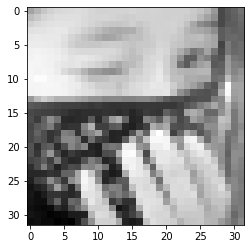

In [ ]:
#Now, we want to begin building our training data! Step 1

for img in os.listdir('/content/train_img/train_images_processed'):  # iterate over each image in the dataset
        img_array = cv2.imread(os.path.join('/content/train_img/train_images_processed',img),cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display

        break  # we just want one for now so break

In [ ]:
#tesing the array view
print(img_array)

[[164 178 191 ... 107 114 127]
 [184 194 203 ... 105 112 121]
 [201 206 210 ... 109 110 118]
 ...
 [ 50  46  43 ... 162 128 134]
 [ 54  49  46 ... 153 120 134]
 [ 47  50  44 ... 142 125 142]]


In [ ]:
#testing the array shape
print(img_array.shape)

(32, 32)


# KNN Benchmark Model

In [ ]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
train_data_benchmark = []
test_data_benchmark = []

In [ ]:
# datapipeline processing with color pictures for KNN

def data_pipeline_color(path, destination):
  for img in os.listdir(path):  # iterate over each image
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
        destination.append(img_array.flatten()) # dimension flattening

In [ ]:
data_pipeline_color('/content/train_img/train_images_processed', train_data_benchmark)
data_pipeline_color('/content/test_img/content/test_images_processed', test_data_benchmark)

In [ ]:
y_benchmark = train_label['face_mask']

In [ ]:
#same for test data
y_test_benchmark = test_label['face_mask']

In [ ]:
X_benchmark = np.array(train_data_benchmark)
X_test_benchmark = np.array(test_data_benchmark)

In [ ]:
benchmark_model = KNeighborsClassifier(n_neighbors=2)
benchmark_model.fit(X_benchmark, y_benchmark)
acc = benchmark_model.score(X_benchmark, y_benchmark)
print("[INFO] raw pixel accuracy: {:.2f}%".format(acc * 100))

[INFO] raw pixel accuracy: 88.36%


In [ ]:
acc_test = benchmark_model.score(X_test_benchmark, y_test_benchmark)
print("[INFO] raw pixel accuracy: {:.2f}%".format(acc_test * 100))

[INFO] raw pixel accuracy: 53.31%


raw pixel accuracy: 88.36%

and

raw pixel accuracy: 53.31%